In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import filtered CSV file

In [3]:
covid=pd.read_csv('CovidIndia.csv')
covid.head()

C:\Users\Faiz\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,1,2020
1,1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2,2020
2,2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3,2,2020
3,3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2,3,2020
4,4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2,3,2020


In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145849 entries, 0 to 145848
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         145849 non-null  int64  
 1   Num Cases          145846 non-null  float64
 2   Date Announced     145849 non-null  object 
 3   Age Bracket        60013 non-null   object 
 4   Gender             62808 non-null   object 
 5   Detected City      10949 non-null   object 
 6   Detected District  137451 non-null  object 
 7   Detected State     145840 non-null  object 
 8   Current Status     145847 non-null  object 
 9   Day                145849 non-null  int64  
 10  Month              145849 non-null  int64  
 11  Year               145849 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 13.4+ MB


### Removing unnecessary columns

In [5]:
data=covid.iloc[:,1:] # here iloc[rows,colms]
data.head()

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,1,2020
1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2,2020
2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3,2,2020
3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2,3,2020
4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2,3,2020


### Check for null values and % of null values in each columns

In [6]:
# for null valaues and also check in % in each colms
data.isnull().sum(axis=0).sort_values(ascending=False)/len(data)*100

Detected City        92.492921
Age Bracket          58.852649
Gender               56.936283
Detected District     5.758010
Detected State        0.006171
Num Cases             0.002057
Current Status        0.001371
Date Announced        0.000000
Day                   0.000000
Month                 0.000000
Year                  0.000000
dtype: float64

In [7]:
data.iloc[1] # it shows rows i.e row 1

Num Cases                   1.0
Date Announced       02/02/2020
Age Bracket                 NaN
Gender                      NaN
Detected City         Alappuzha
Detected District     Alappuzha
Detected State           Kerala
Current Status        Recovered
Day                           2
Month                         2
Year                       2020
Name: 1, dtype: object

In [8]:
data.loc[[1,23],:] # similarly [rows,colms]

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2,2020
23,1.0,04/03/2020,45,F,Agra,Agra,Uttar Pradesh,Recovered,4,3,2020


### Covid cases Month wise 

In [99]:
data['Current Status'].unique()

array(['Recovered', 'Hospitalized', 'Deceased', 'Migrated',
       'Migrated_Other', nan, 'Migrated_other'], dtype=object)

In [67]:
n=data.groupby('Month')['Num Cases'].sum()
n

Month
1         1.0
2         2.0
3      1635.0
4     36078.0
5    242853.0
6    663178.0
7    270185.0
Name: Num Cases, dtype: float64

Text(0, 0.5, 'Number of Cases')

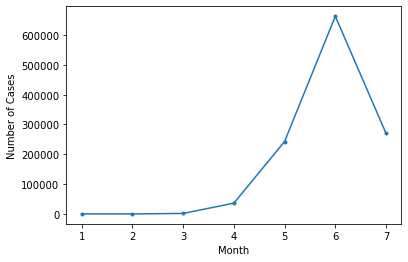

In [68]:
n.plot(marker='.')
plt.ylabel('Number of Cases')

### Hospitalized cases month wise

In [12]:
m=data[data['Current Status']=='Hospitalized'].groupby('Month')['Num Cases'].sum()
m

Month
3      1431.0
4     33209.0
5    155781.0
6    395144.0
7    157701.0
Name: Num Cases, dtype: float64

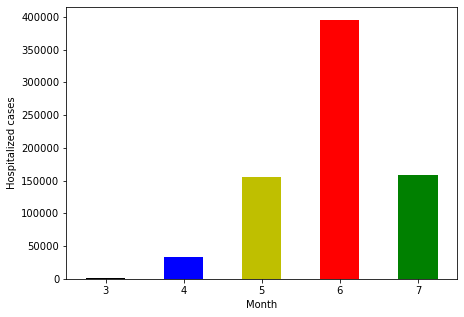

In [70]:
m.plot.bar(figsize=(7,5),color=['k','b','y','r','g'])
plt.ylabel('Hospitalized cases')
plt.xlabel('Month')
plt.xticks(rotation=360);

<AxesSubplot:xlabel='Month'>

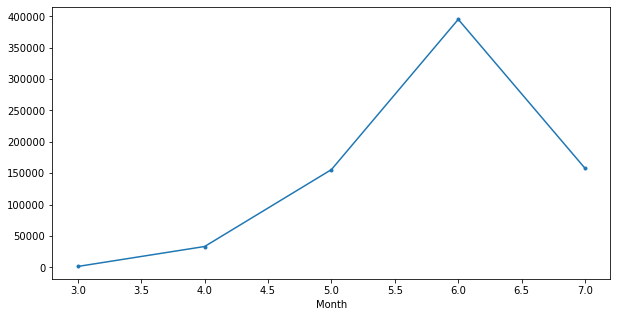

In [14]:
m.plot(figsize=(10,5),marker='.')

In [100]:
# cases month wise confirmed (recovered)
#    means recovered ke per-month me katte cases hai karko 

re=data[data['Current Status']=='Recovered'].groupby('Month')['Num Cases'].sum()
re

Month
1         1.0
2         2.0
3       177.0
4      2573.0
5     82804.0
6    255977.0
7    109206.0
Name: Num Cases, dtype: float64

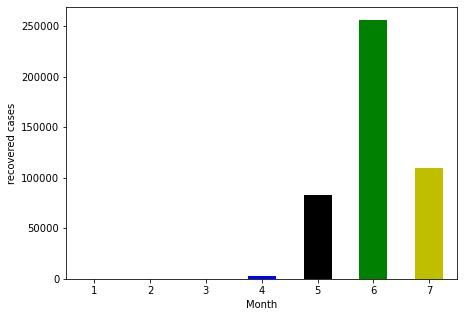

In [101]:
re.plot.bar(figsize=(7,5),color=['g','y','r','b','k'])
plt.ylabel('recovered cases')
plt.xticks(rotation=360);

In [105]:
de=data[data['Current Status']=='Deceased'].groupby('Month')['Num Cases'].sum()
de

Month
3       23.0
4      295.0
5     4251.0
6    12004.0
7     3244.0
Name: Num Cases, dtype: float64

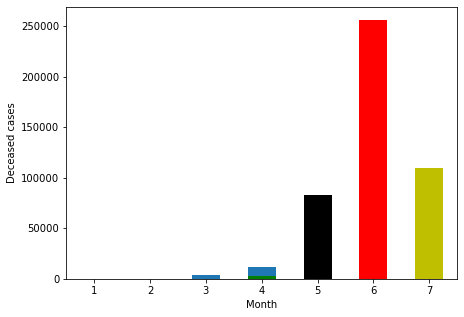

In [110]:
de.plot.bar()
re.plot.bar(figsize=(7,5),color=['r','y','r','g','k'])
plt.ylabel('Deceased cases')
plt.xticks(rotation=360);

### total male and female infected

In [16]:
data[data['Gender']=='F']

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,1,2020
20,1.0,04/03/2020,70,F,Jaipur,Italians,Rajasthan,Recovered,4,3,2020
22,1.0,04/03/2020,NaN,F,Agra,Agra,Uttar Pradesh,Recovered,4,3,2020
23,1.0,04/03/2020,45,F,Agra,Agra,Uttar Pradesh,Recovered,4,3,2020
36,1.0,08/03/2020,53,F,Ranni,Pathanamthitta,Kerala,Recovered,8,3,2020
...,...,...,...,...,...,...,...,...,...,...,...
145506,1.0,07/07/2020,21.0,F,NaN,Ballari,Karnataka,Hospitalized,7,7,2020
145507,1.0,07/07/2020,46.0,F,NaN,Ballari,Karnataka,Hospitalized,7,7,2020
145508,1.0,07/07/2020,15.0,F,NaN,Ballari,Karnataka,Hospitalized,7,7,2020
145512,1.0,07/07/2020,35.0,F,NaN,Yadgir,Karnataka,Hospitalized,7,7,2020


### Total female infected and no of cases


In [17]:
female=data[data['Gender']=='F'].groupby('Current Status')['Num Cases'].sum()
female

Current Status
Deceased            332.0
Hospitalized      20444.0
Migrated_Other        2.0
Recovered           516.0
Name: Num Cases, dtype: float64

### Total male infected and no of cases


In [18]:
male=data[data['Gender']=='M'].groupby('Current Status')['Num Cases'].sum()
male

Current Status
Deceased            715.0
Hospitalized      41201.0
Migrated_Other        1.0
Recovered           878.0
Name: Num Cases, dtype: float64

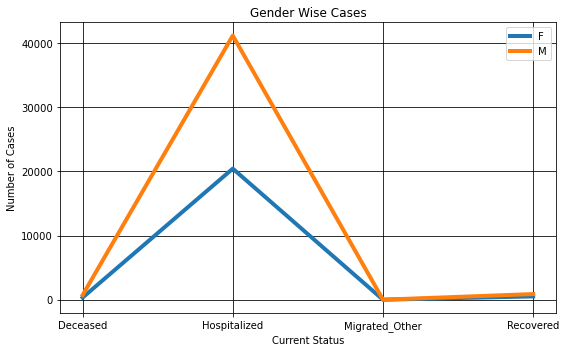

In [19]:
plt.figure(figsize=(8,5))
plt.plot(female,linewidth=4,label='F')
plt.plot(male,linewidth=4,label='M')

plt.grid(True,color='k')

plt.title('Gender Wise Cases')
plt.xlabel('Current Status')
plt.ylabel('Number of Cases')
plt.legend()

plt.tight_layout()

In [20]:
# total male and female infected
fm=data.groupby('Gender')['Num Cases'].sum()
fm

Gender
F             21294.0
M             42795.0
M                 1.0
Non-Binary       12.0
Name: Num Cases, dtype: float64

<AxesSubplot:xlabel='Gender'>

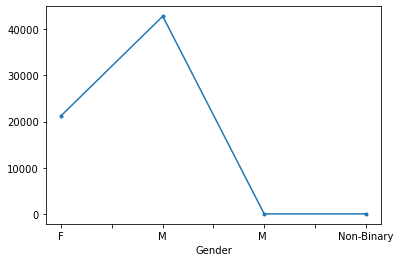

In [21]:
fm.plot(marker='.')

### pie chart of males and females cases

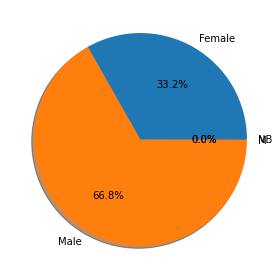

In [22]:
gen=data.groupby('Gender')['Num Cases'].sum()
plt.pie(gen,labels=['Female','Male','M','NB'],autopct='%0.1f%%',shadow=True);
plt.tight_layout()

In [113]:
# age group is infected most
n=data.groupby('Age Bracket')['Num Cases'].sum().sort_values(ascending=False).head(10)
n

Age Bracket
30.0    1209.0
40.0    1027.0
25.0    1015.0
35.0     992.0
32.0     936.0
45.0     893.0
24.0     880.0
28.0     858.0
27.0     818.0
26.0     810.0
Name: Num Cases, dtype: float64

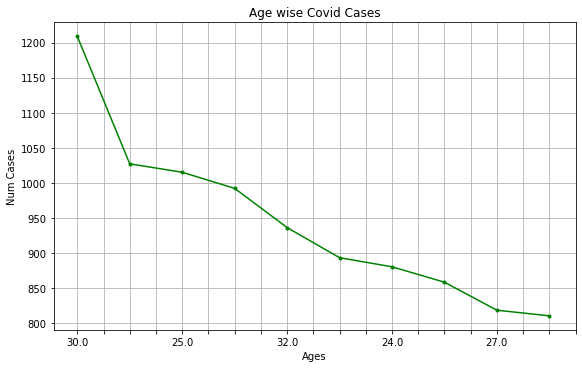

In [122]:
n.plot(color='g',marker='.',figsize=(8,5))
plt.xticks(np.arange(0,10,0.5))
plt.grid()
plt.tight_layout()
plt.xlabel('Ages')
plt.ylabel('Num Cases')
plt.title('Age wise Covid Cases')
plt.xticks(rotation=360);

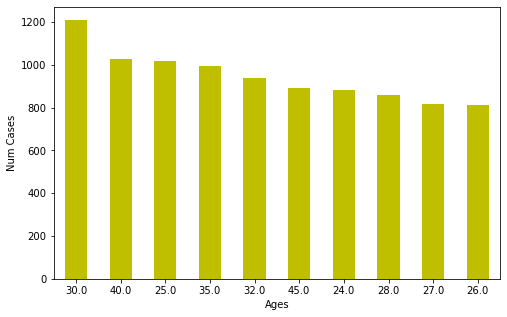

In [120]:
n.plot.bar(color='y',figsize=(8,5))
plt.xlabel('Ages')
plt.ylabel('Num Cases')
plt.xticks(rotation=360);

In [171]:
# state wise total cases
st=data.groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False).head(10)
t=st
g=t.sort_values(ascending=True)
g   

Detected State
Haryana           31721.0
Rajasthan         37781.0
Karnataka         38135.0
West Bengal       40306.0
Telangana         43871.0
Uttar Pradesh     50069.0
Gujarat           65894.0
Delhi            179282.0
Tamil Nadu       190302.0
Maharashtra      343418.0
Name: Num Cases, dtype: float64

### Use of barh i.e inverted form of bar chart
    https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.barh.html

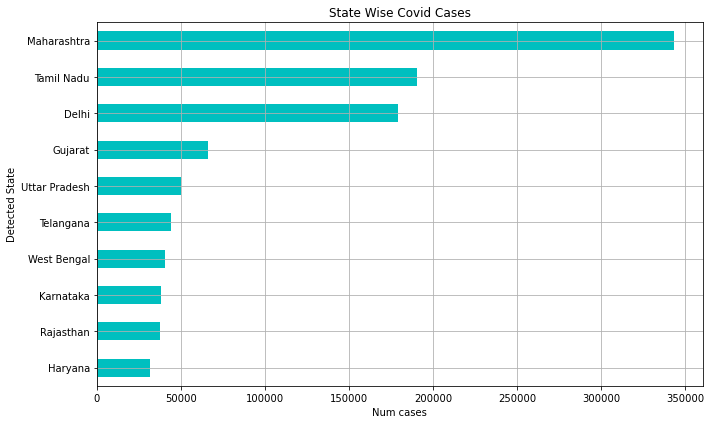

In [175]:
g.plot.barh(figsize=(10,6),y='Detected State',color='c')
plt.xlabel('Num cases')
plt.title('State Wise Covid Cases')
plt.grid()
plt.tight_layout()
plt.xticks(rotation=360);

#### Find the top 5 states with total no. of Hospitalized cases 

In [27]:
# state wise total cases i.e hospitalized
data[data['Current Status']=='Hospitalized'].groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False).head(5)

# so Maharashtra , Tamil Nadu top hospt cases

Detected State
Maharashtra      217107.0
Tamil Nadu       118587.0
Delhi            102827.0
Gujarat           37631.0
Uttar Pradesh     29959.0
Name: Num Cases, dtype: float64

In [28]:
# how many cases everyday
data.head()

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,1,2020
1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2,2020
2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3,2,2020
3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2,3,2020
4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2,3,2020


### Every Day Hospitalized Cases  (IMP) ✨

In [29]:
                                            # because first comes month then days
data[data['Current Status']=='Hospitalized'].groupby(['Month','Day'])[['Num Cases']].sum().head(10)

Num Cases
Month Day           
3     4          5.0
      5          1.0
      7          2.0
      9          4.0
      10         4.0
      11         8.0
      12         4.0
      13         6.0
      14        11.0
      15         8.0

Text(47.125, 0.5, 'Cases')

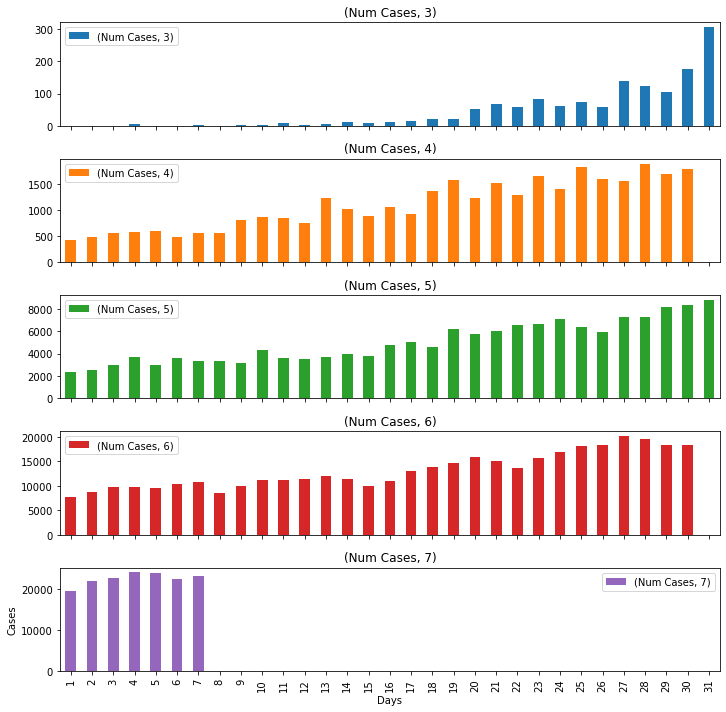

In [30]:
# in bar graphs 
h=data[data['Current Status']=='Hospitalized'].groupby(['Month','Day'])[['Num Cases']].sum()
h.unstack(level=0).plot(subplots=True,kind='bar',figsize=(10,10))

plt.tight_layout()

plt.xlabel('Days')
plt.ylabel('Cases')

### Total no. of deaths state wise

In [31]:
# no. of deaths by state wise
d=data[data['Current Status']=='Deceased'].groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False).head(5)
d

# so Mahra,delhi,gujra highest deaths

Detected State
Maharashtra      8919.0
Delhi            3112.0
Gujarat          1831.0
Tamil Nadu       1613.0
Uttar Pradesh     798.0
Name: Num Cases, dtype: float64

### for same code as Above pltotting

Text(0.5, 1.0, 'State wise covid Deaths')

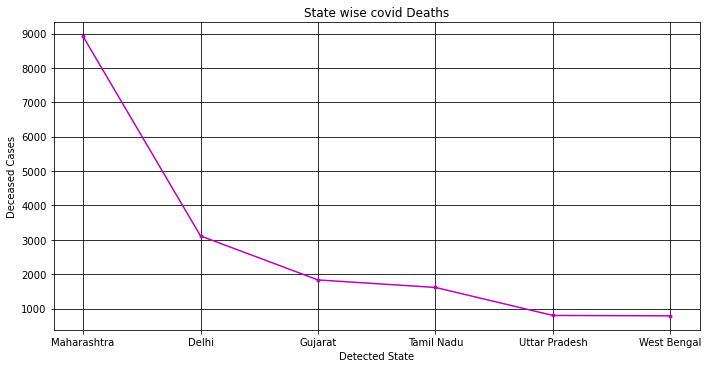

In [186]:
# no. of deaths by state wise
death_state_wise=data[data['Current Status']=='Deceased'].groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False).head(6)

death_state_wise.plot(color='m',marker='.',figsize=(10,5))

plt.xticks(rotation=360) # here it rotates the xlabels to degree
plt.grid(True,color='k')
plt.ylabel('Deceased Cases')
plt.tight_layout()
plt.title('State wise covid Deaths')

# same as above

### Practice more below

### 1st - Ploting the curve on graph

In [33]:
# no. of cases per month
data.groupby('Month')['Num Cases'].sum()

Month
1         1.0
2         2.0
3      1635.0
4     36078.0
5    242853.0
6    663178.0
7    270185.0
Name: Num Cases, dtype: float64

Text(0, 0.5, 'Covid cases')

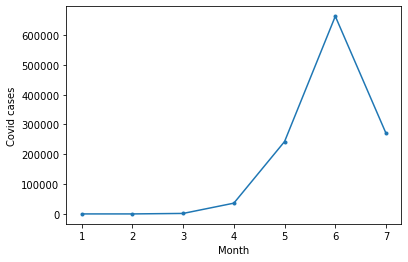

In [34]:
data.groupby('Month')['Num Cases'].sum().plot(marker='.')
plt.ylabel('Covid cases')

### lineplots by states

In [35]:
data.head()

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,1,2020
1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2,2020
2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3,2,2020
3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2,3,2020
4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2,3,2020


### State wise cases

In [36]:
data.groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False).head(2)

Detected State
Maharashtra    343418.0
Tamil Nadu     190302.0
Name: Num Cases, dtype: float64

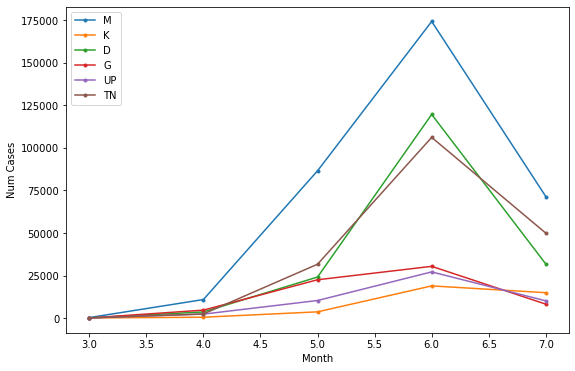

In [37]:
data[data['Detected State']=='Maharashtra'].groupby('Month')['Num Cases'].sum().plot(figsize=(9,6),label='M',marker='.')
data[data['Detected State']=='Karnataka'].groupby('Month')['Num Cases'].sum().plot(label='K',marker='.')
data[data['Detected State']=='Delhi'].groupby('Month')['Num Cases'].sum().plot(label='D',marker='.')
data[data['Detected State']=='Gujarat'].groupby('Month')['Num Cases'].sum().plot(label='G',marker='.')
data[data['Detected State']=='Uttar Pradesh'].groupby('Month')['Num Cases'].sum().plot(label='UP',marker='.')
data[data['Detected State']=='Tamil Nadu'].groupby('Month')['Num Cases'].sum().plot(label='TN',marker='.')


plt.ylabel('Num Cases')
plt.legend(loc=2)

In [38]:
data['Detected State'].unique()

array(['Kerala', 'Delhi', 'Telangana', 'Rajasthan', 'Haryana',
       'Uttar Pradesh', 'Ladakh', 'Tamil Nadu', 'Jammu and Kashmir',
       'Karnataka', 'Maharashtra', 'Punjab', 'Andhra Pradesh',
       'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal', 'Chandigarh',
       'Chhattisgarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Goa',
       'Andaman and Nicobar Islands', 'Jharkhand', 'Assam',
       'Arunachal Pradesh', nan, 'Tripura', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu', 'State Unassigned',
       'Sikkim', 'Nagaland'], dtype=object)

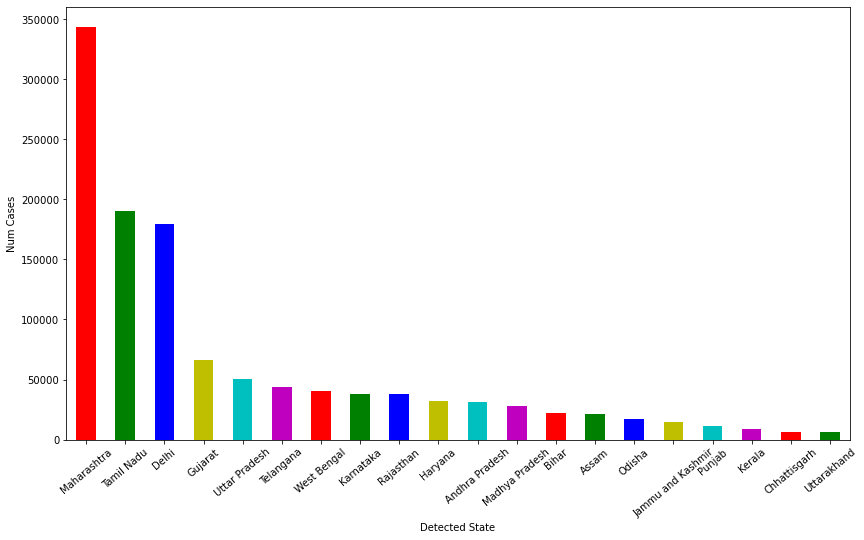

In [180]:
data.groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False).head(20).plot.bar(figsize=(12,8),color=['r','g','b','y','c','m'])
                              ### ******** imp ***********                                       # changing bar colors.
plt.ylabel('Num Cases')
plt.tight_layout()

plt.xticks(rotation=40);